In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import extract
import visualize
from sklearn import tree
import pydotplus
import seaborn as sns
import time

In [2]:
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestRegressor

In [3]:
d = extract.get_data()
d = extract.clean_data(d)
s0 = pd.read_csv("./data/price_change_data.csv", usecols = ['d_index', 'tradetype',
		'state', 'coupon', 'maturity', 'issuetype', 'issuesource', 'rtg',
		'tradedate', 'dprice', 'holdtime'])
d_index = s0.pop('d_index')
s_state_features = extract.build_state_features(s0, num_states = None)
s_other_features = extract.build_other_text_features(s0)
s = pd.concat([s0.drop(['state', 'issuetype', 'issuesource', 'tradetype'], axis = 1), s_state_features, s_other_features], axis = 1)
s = s.dropna()
s = s[s.holdtime < 7] #pick out only data with holdtime < 7 days
dprice = s.pop('dprice')

/home/mark/Math/bondproject/venv/local/lib/python2.7/site-packages/pandas/core/indexing.py:477: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s
/home/mark/Math/bondproject/venv/local/lib/python2.7/site-packages/pandas/core/indexing.py:297: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)


In [4]:
s_train, s_test, dp_train, dp_test = train_test_split(s, dprice, test_size=0.20, random_state=180)

In [5]:
clf1 = RandomForestRegressor(max_depth = 25, n_estimators = 100)
clf2 = RandomForestRegressor(max_depth = 25, n_estimators = 100)

In [6]:
clf1.fit(s_train, dp_train.values)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=25,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_split=1e-07, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=100, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)

### Permute dp_train values for permutation test

In [7]:
dp_train_permuted = dp_train.copy()
dp_train_permuted = dp_train_permuted.reindex(np.random.permutation(dp_train_permuted.index))
print(dp_train_permuted.values[:5])
print(dp_train.values[:5])

[-1.198 -4.016 -2.41  -0.159 -2.86 ]
[-2.533 -2.398 -3.025 -1.405  0.903]


In [8]:
clf2.fit(s_train, dp_train_permuted.values)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=25,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_split=1e-07, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=100, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)

In [9]:
dp_predict_1 = clf1.predict(s_test)
dp_predict_2 = clf2.predict(s_test)

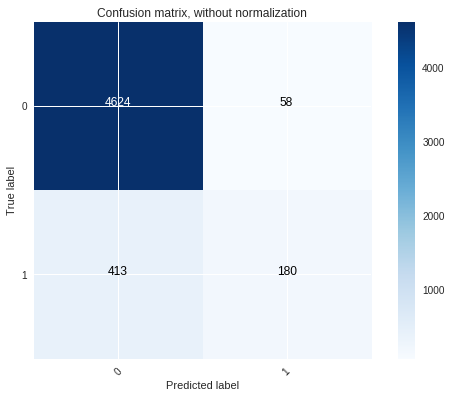

In [10]:
cnf_matrix_1 = confusion_matrix((dp_test>0).astype(np.int), (dp_predict_1>0).astype(np.int))
plt.figure()
visualize.plot_confusion_matrix(cnf_matrix_1, classes=[0, 1], title='Confusion matrix, without normalization')
plt.show()

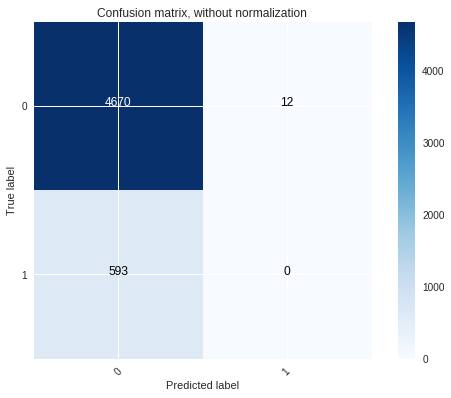

In [11]:
cnf_matrix_2 = confusion_matrix((dp_test>0).astype(np.int), (dp_predict_2>0).astype(np.int))
plt.figure()
visualize.plot_confusion_matrix(cnf_matrix_2, classes=[0, 1], title='Confusion matrix, without normalization')
plt.show()